In [1]:
from ortools.sat.python import cp_model
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
grid = [[10,10,10,10,10,10,10,10],
        [10,10,10,0,0,0,10,10],
        [10,0,2,1,0,0,10,10],
        [10,10,10,0,1,0,10,10],
        [10,0,10,10,1,0,10,10],
        [10,0,10,0,0,0,10,10],
        [10,1,0,1,1,1,0,10],
        [10,0,0,0,0,0,0,10],
        [10,10,10,10,10,10,10,10]]

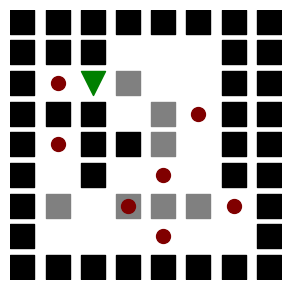

In [3]:
size = 300

loc = [(2,1), (3,5), (4,1), (5,4), (6,3), (6,6), (7,4)]

feature = {0: {'color': 'w', 'marker': 's'},
         1: {'color': 'grey', 'marker': 's'},
         2: {'color': 'g', 'marker': 'v'},
         10: {'color': 'k', 'marker': 's'}}

plt.figure(figsize=(3.5,3.5))
for i in range(len(grid)):
    for j in range(len(grid[0])):
        if (i,j) in loc:
            plt.scatter(j,8-i, marker = 'o', s = 100, c = 'maroon', zorder = 2)
        plt.scatter(j,8-i, marker = feature[grid[i][j]]['marker'], s= size, c = feature[grid[i][j]]['color'])

plt.axis('off');

In [4]:
# Creates the model and set solver
model = cp_model.CpModel()
solver = cp_model.CpSolver()

# Size of the grid
rows = range(9)
cols = range(8)

# Number of stages
S = range(200)

# Cell variables at each stage
x = {(i,j,s): model.NewIntVar(0, 10, f'x_{i}_{j}_{s}') for i in rows for j in cols for s in S}

# Direction that player moves
left = {(i,j,s): model.NewBoolVar(f'up_{i}_{j}_{s}') for i in rows for j in cols for s in S}
right = {(i,j,s): model.NewBoolVar(f'down_{i}_{j}_{s}') for i in rows for j in cols for s in S}
up = {(i,j,s): model.NewBoolVar(f'left_{i}_{j}_{s}') for i in rows for j in cols for s in S}
down = {(i,j,s): model.NewBoolVar(f'right_{i}_{j}_{s}') for i in rows for j in cols for s in S}

# Termination {1 if terminated, 0 otherwise}
term = {(s): model.NewBoolVar(f'term_{s}') for s in S}

# Initializing grid
for i in rows:
    for j in cols:
        model.Add(x[i,j,0] == grid[i][j])

# Model must terminate
model.AddAtLeastOne([term[s] for s in S])

for s in S:
    # Only one choice per state
    model.Add(sum(left[i,j,s] + right[i,j,s] + up[i,j,s] + down[i,j,s] for i in rows for j in cols) <= 1)
    # If terminated, then the sume of the selected locations of the puzzle must be 6
    model.Add(sum(x[i,j,s] for i in rows for j in cols if (i,j) in loc) == 7).OnlyEnforceIf(term[s])

    if s > 0:
        for i in rows:
            for j in cols:
                # Boundaries stay the same
                if grid[i][j] == 10:
                    model.Add((left[i,j,s] + right[i,j,s] + up[i,j,s] + down[i,j,s]) == 0)
                    model.Add(x[i,j,s-1] == x[i,j,s])
                    continue
                # Up
                if i>1 and grid[i-1][j] + grid[i-2][j] < 10:
                    pass

                
                


# Solving
status = solver.Solve(model)
# print(f"Status = {solver.StatusName(status)}")

# # Storing Solution
# sol = [solver.value(x[i,j,s]) for s in S for i in rows for j in cols]
# sol = np.reshape(sol, (len(S),len(rows),len(cols)))

: 